# AIPI 590 - XAI | Assignment #04

#### For a model and dataset of your choice, produce PDP, ICE, and ALE plots. Exploratory analysis of your dataset should be performed to determine the amount of correlation between features.  
Provide a comprehensive explanation of your plots. Discuss any interesting findings that are shown in the plots. Discuss any differences you see in the PDP and ALE plots. Discuss your exploratory findings around correlation between features and the impact this has (if any) on your results.
### Peter Banyas

#### Include the button below. Change the link to the location in your github repository:
#### Example: https://colab.research.google.com/github/banyasp/aipi590_hw3_pdp_ice_ale/blob/main/hw4_aipi590.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/templates/template.ipynb)

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "aipi590_hw3_pdp_ice_ale" # Change to your repo name
git_path = 'https://github.com/banyasp/aipi590_hw3_pdp_ice_ale.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'templates'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

---
### Libraries


In [ ]:
# Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
import xgboost
from sklearn.model_selection import train_test_split

# XAI
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

np.random.seed(1)

------
# Dataset

**Dataset**
I'm using an advertising dataset located in advertising.csv. The dataset contains advertising spend data for TV, Radio, and Newspaper media, with Sales as the target variable to predict.

- Features: TV, Radio, Newspaper (advertising spend in thousands)
- Target: Sales (in thousands of units)

**Model**
We will train an XGBoost classifier model with default parameters for explanatory purposes. We are also performing a 50-50 train/test split for optimization purposes.

In [ ]:
# built with cursor
# Import the advertising dataset setup function
from advertising_data_setup import setup_advertising_model

# Setup the advertising dataset (replaces all the biking dataset code)
print("🔄 Switching from Biking to Advertising Dataset...")
advertising_data = setup_advertising_model()

# Extract the same variables your existing XAI code expects
X = advertising_data['X']
y = advertising_data['y']
X_train = advertising_data['X_train']
X_test = advertising_data['X_test']
y_train = advertising_data['y_train']
y_test = advertising_data['y_test']
model = advertising_data['model']

print("\n✅ Dataset switched successfully!")
print("📊 New Dataset Info:")
print(f"   • Features: {list(X.columns)} (all numerical)")
print(f"   • Target: Sales (continuous values)")
print(f"   • Samples: {len(X)}")
print(f"   • Task: Regression")
print(f"   • Model R²: {model.score(X_test, y_test):.3f}")
print("\n🎯 Ready for XAI analysis!")

🔄 Switching from Biking to Advertising Dataset...
🚀 Setting up Advertising Dataset for XAI Analysis
📊 Loading advertising dataset from: advertising.csv
✅ Dataset loaded successfully!
   Shape: (200, 4)
   Columns: ['TV', 'Radio', 'Newspaper', 'Sales']

📈 Dataset Overview:
   Features: ['TV', 'Radio', 'Newspaper']
   Target: Sales
   Samples: 200
   Task: Regression (predicting sales from advertising spend)

📋 Feature Information:
   TV: float64 | Range: 0.7 - 296.4
   Radio: float64 | Range: 0.0 - 49.6
   Newspaper: float64 | Range: 0.3 - 114.0

🎯 Target Information:
   Sales: float64 | Range: 1.6 - 27.0

✂️ Splitting data (test_size=0.3)...
   Training set: 140 samples
   Test set: 60 samples

🤖 Training XGBoost Regressor...

📊 Model Performance:
   Training RMSE: 0.25
   Test RMSE: 1.45
   Training R²: 0.998
   Test R²: 0.925
   ✅ Good model performance (R² > 0.7)

🎉 Setup complete! Ready for XAI analysis.

✅ Dataset switched successfully!
📊 New Dataset Info:
   • Features: ['TV', 'R

----
# Preliminary exploratory analysis

🚀 Running Exploratory Data Analysis...
📊 PRELIMINARY EXPLORATORY DATA ANALYSIS

🔍 DATASET OVERVIEW
------------------------------
Dataset Shape: (200, 4)
Features: ['TV', 'Radio', 'Newspaper', 'Sales']
Data Types:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Memory Usage: 6.38 KB

🚫 MISSING VALUES
--------------------
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
✅ No missing values found!

📈 DESCRIPTIVE STATISTICS
------------------------------
           TV   Radio  Newspaper   Sales
count  200.00  200.00     200.00  200.00
mean   147.04   23.26      30.55   15.13
std     85.85   14.85      21.78    5.28
min      0.70    0.00       0.30    1.60
25%     74.38    9.98      12.75   11.00
50%    149.75   22.90      25.75   16.00
75%    218.82   36.52      45.10   19.05
max    296.40   49.60     114.00   27.00

🎯 OUTLIER DETECTION (IQR Method)
----------------------------------------
     Feature  Outliers Perc

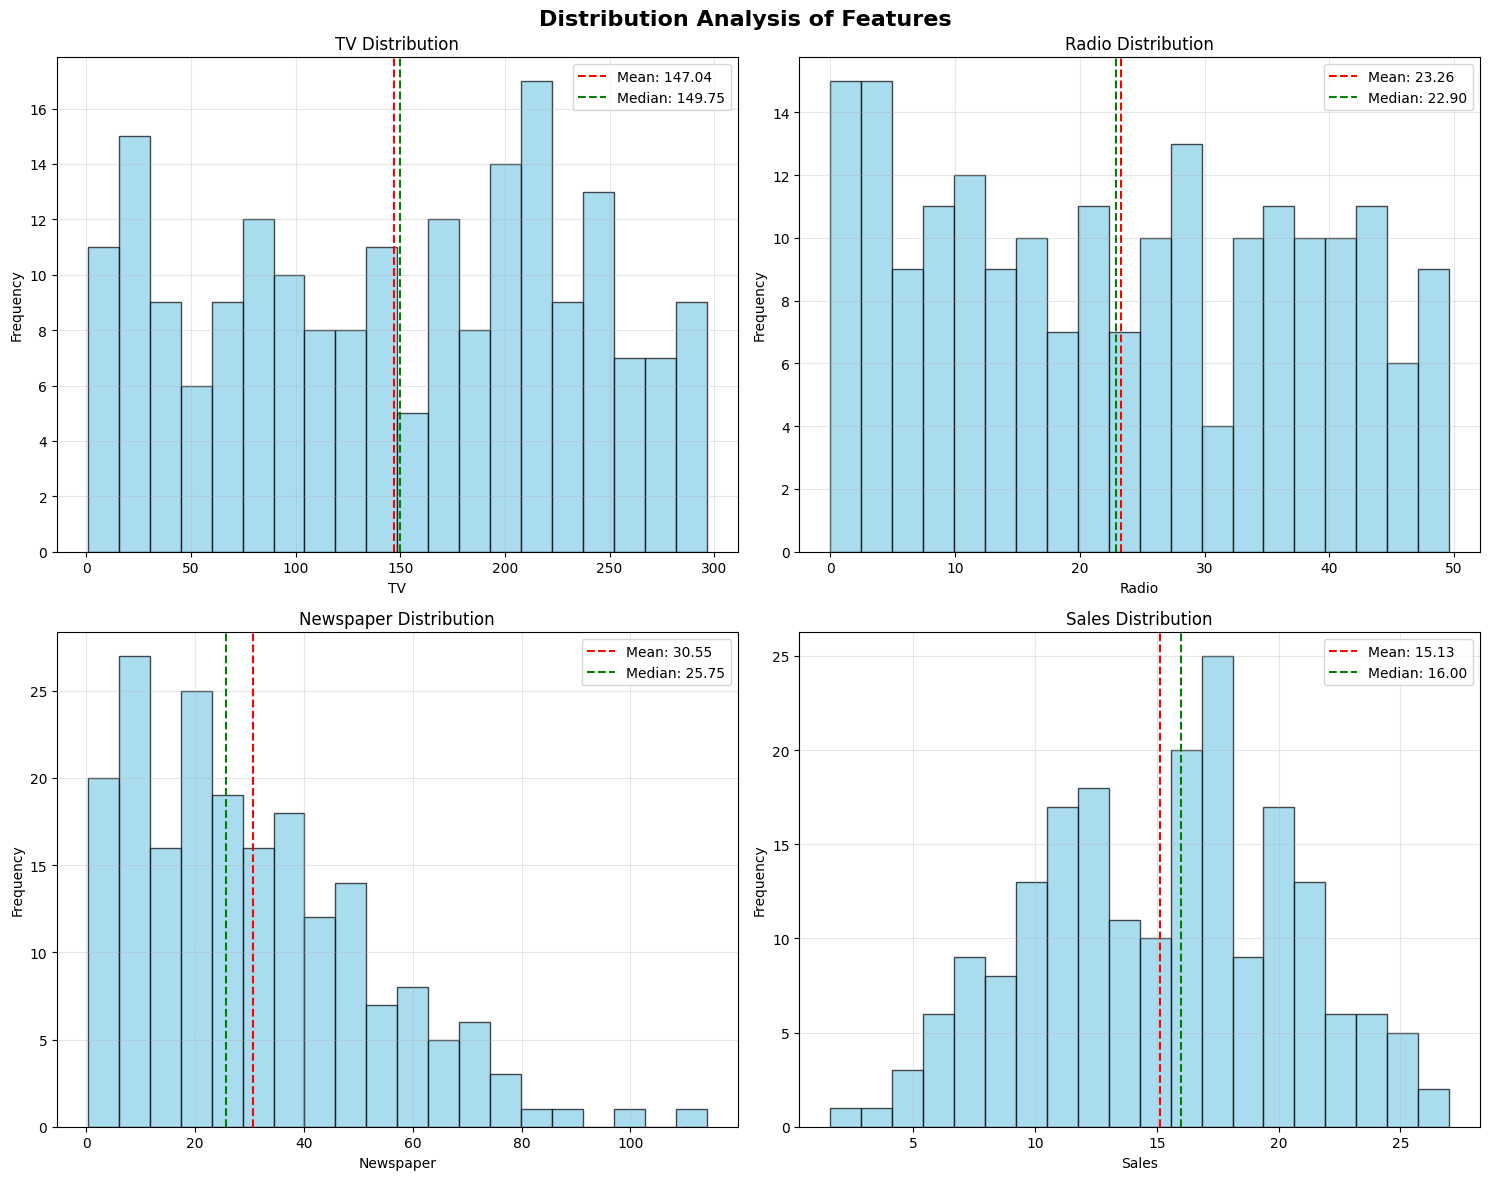


🔗 CORRELATION ANALYSIS
📊 PEARSON CORRELATION MATRIX
-----------------------------------
              TV  Radio  Newspaper  Sales
TV         1.000  0.055      0.057  0.901
Radio      0.055  1.000      0.354  0.350
Newspaper  0.057  0.354      1.000  0.158
Sales      0.901  0.350      0.158  1.000

📊 SPEARMAN CORRELATION MATRIX
-----------------------------------
              TV  Radio  Newspaper  Sales
TV         1.000  0.056      0.051  0.901
Radio      0.056  1.000      0.317  0.340
Newspaper  0.051  0.317      1.000  0.123
Sales      0.901  0.340      0.123  1.000

🔍 DETAILED CORRELATION ANALYSIS
---------------------------------------------
      Feature Pair  Pearson r Pearson Interpretation  Spearman r Spearman Interpretation
       TV vs Radio      0.055     Positive Very Weak       0.056      Positive Very Weak
   TV vs Newspaper      0.057     Positive Very Weak       0.051      Positive Very Weak
       TV vs Sales      0.901   Positive Very Strong       0.901    Positive V

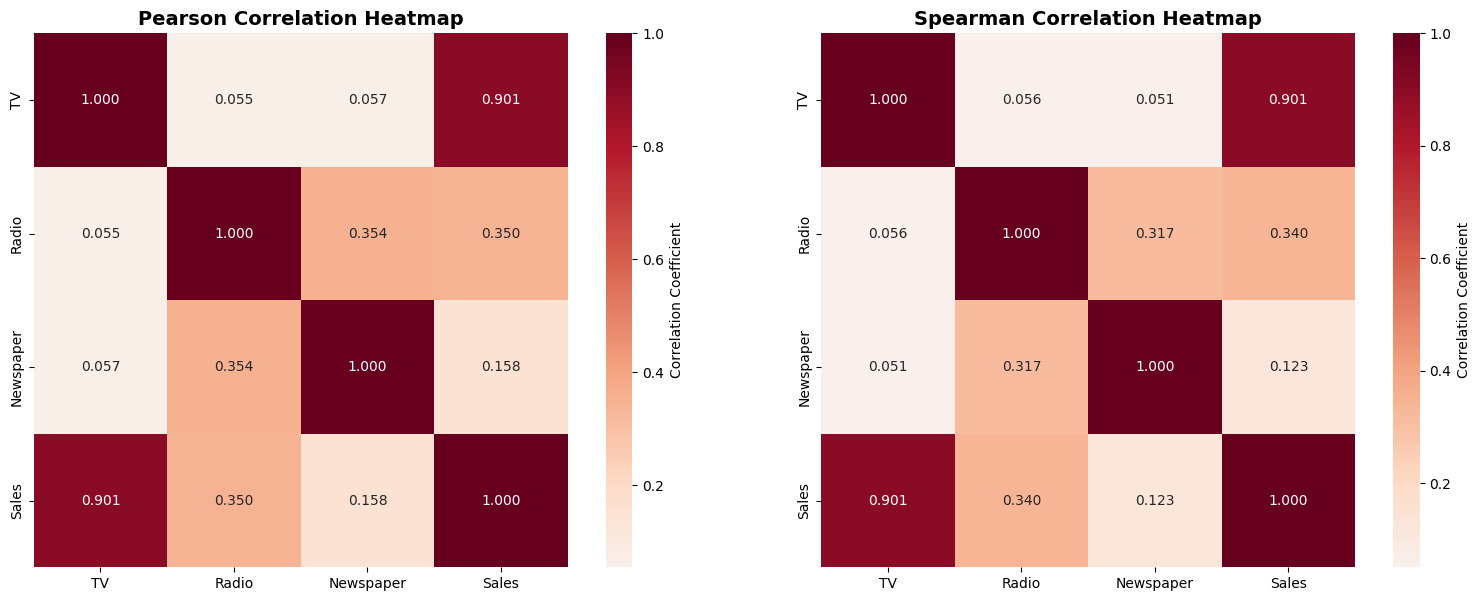


📈 PAIRWISE RELATIONSHIP VISUALIZATION
---------------------------------------------


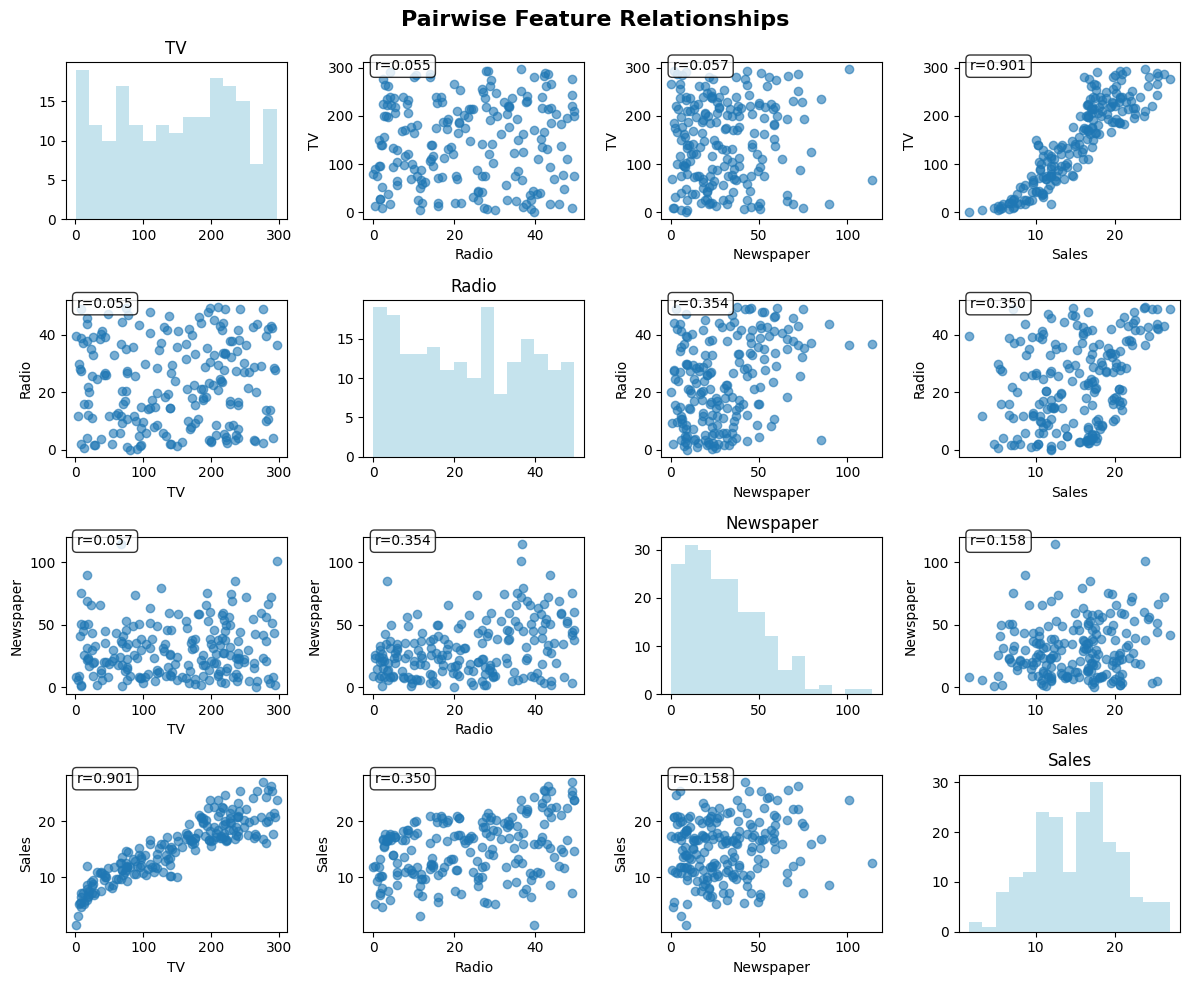


🎯 FEATURE IMPORTANCE FOR TARGET (SALES)
--------------------------------------------------
Features ranked by correlation with Sales:
  • TV          :  0.901 (Positive Very Strong)
  • Radio       :  0.350 (Positive Weak)
  • Newspaper   :  0.158 (Positive Very Weak)

💡 KEY INSIGHTS
🔴 Highest correlation between features:

🎯 Best predictor of Sales: TV (r=0.901)
🎯 Weakest predictor of Sales: Newspaper (r=0.158)

⚠️  MULTICOLLINEARITY CHECK
-----------------------------------
✅ No high multicollinearity detected between features

🏁 Exploratory Analysis Complete!
Ready to proceed with PDP, ICE, and ALE analysis...

📋 QUICK ACCESS VARIABLES CREATED:
   • df: Original dataset
   • pearson_corr: Pearson correlation matrix
   • spearman_corr: Spearman correlation matrix
   • target_correlations: Feature correlations with Sales
   • analysis_results: Complete analysis results dictionary
   • correlation_insights: Formatted key insights

        🎯 CORRELATION INSIGHTS SUMMARY:
        • Best

In [ ]:
# built with cursor
# Import the exploratory analysis function
from exploratory_analysis import run_exploratory_analysis, get_correlation_insights

# Run comprehensive exploratory analysis
print("🚀 Running Exploratory Data Analysis...")
analysis_results = run_exploratory_analysis(
    data_path='advertising.csv',
    show_plots=True
)

# Store key variables for easy access
df = analysis_results['dataset']
pearson_corr = analysis_results['correlations']['pearson']
spearman_corr = analysis_results['correlations']['spearman']
target_correlations = analysis_results['target_correlations']
correlation_insights = get_correlation_insights(analysis_results)

print(f"\n📋 QUICK ACCESS VARIABLES CREATED:")
print("   • df: Original dataset")
print("   • pearson_corr: Pearson correlation matrix")
print("   • spearman_corr: Spearman correlation matrix")
print("   • target_correlations: Feature correlations with Sales")
print("   • analysis_results: Complete analysis results dictionary")
print("   • correlation_insights: Formatted key insights")

print(correlation_insights['summary'])


## **commentary on dataset**
The TV distribution looks relatively random-uniform, as does the radio distribution (albeit a slight bias towards a lower #). Newspaper is heavily skewed  right with a higher concentration of low values.  The output feature that we're predicting, sales, appears almost normally distributed.  These distributions could affect how the model learns; for the newspaper feature, high values are almost outliers, so big changes in that value  doesn't really change where in the percentiles a data point. [! this becomes relevant for PDP !]

The 3 features of TV, Radio, and Newspaper appear *not* to be particularly correlated, with correlation scores of 0.055, 0.057, and 0.35.  Meanwhile, there are big discrepancies in how much an input feature correlates to the output feature of sales.
- TV has a .901 correlation with sales, which would suggest that our model is going to learn to heavily rely on that.
- Radio has a .35 correlation, and newspaper has a .15 correlation.  My prediction would be that the model gives less importance to data features as a result.

Looking at the paralyzed speaker plugs, there doesn't seem to be a very clear relationship between her features, so we can proceed as if they're uncorrelated.

----------
# Partial Dependence Plots (PDP)

A Partial Dependence Plot (PDP or PD) shows the marginal effect one or two features have on the predicted outcome of a model [Paper, 2001](https://jerryfriedman.su.domains/ftp/trebst.pdf)

**How it Works:**
1. Select feature of interest
2. For every instance in training dataset:
* Keep all other features the same, create variants of the instance by replacing the feature’s value with values from a grid
* Make predictions with the black box model for newly created instances
* You now have a set of points for an instance with the feature value from the grid and the respective predictions
3. Average across all instances and plot

Here we will show both a built-in library implementation, [scikit learn's Partial Dependence Display](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html) and we will build our own implementation in numpy.


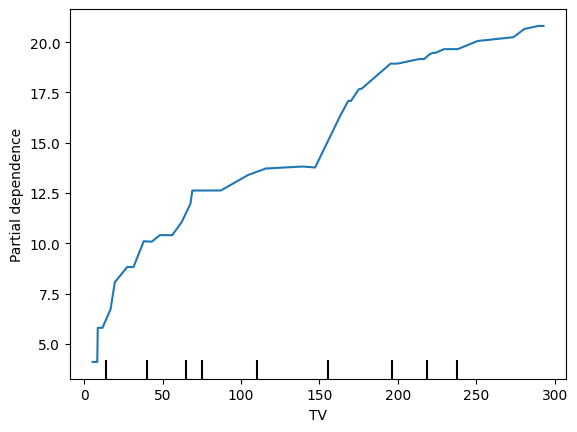

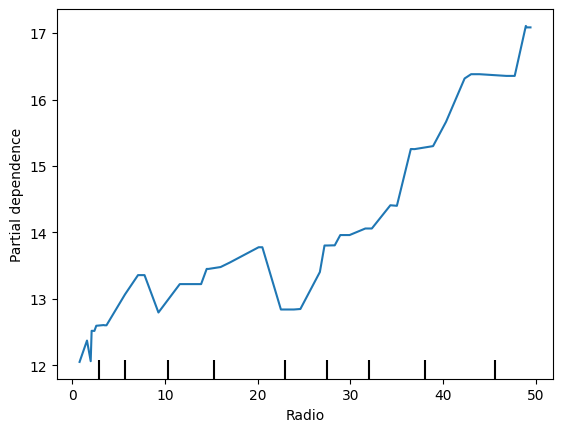

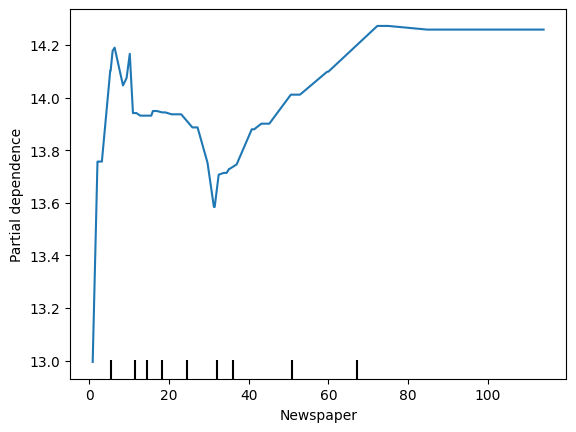

In [ ]:
# built with cursor
# Choose the feature of interest
features = ["TV", "Radio", "Newspaper"]

for feature in features:
    # Use PartialDependenceDisplay to plot PDP
    PartialDependenceDisplay.from_estimator(model, X_test, [feature], kind='average') #kind='both'


## **commentary on PDP**

The Partial Dependence Plots show the average effect of how changing a feature affects predictions across all the observations. This can help us develop an intuition for how that feature contributes to the ultimate prediction made by the model.

Pulling on the thread from the original data set analysis, we can see in the PTP plot that once the value gets above 70, further increases to the newspaper value don't affect its partial dependence.This makes sense because once you have a huge amount of newspaper sales, you're no longer dramatically changing your percentile relative to the other data points. So we would want that feature to almost "saturate."

For the TV PDP plot, we see a general positive trend, where increasing the advertising spend through TV increases the predicted sales. However, in the mid-range and high-range, this appears to be relatively flat. The biggest contributions from this feature come when you are moving from 0 to 50 TVs and then from 150 to 200. This seems to suggest that the initial ad spend on TV Programming provides a big jump in sales, and then it seems that spending more doesn't necessarily help until you make a bigger jump and get into a new or more expensive advertising market, like taking out a Super Bowl ad, which provides additional benefits. But, of course, once you get sufficiently high, perhaps you reach a saturation where enough people have seen your advertisement, and the people who want to get your product already know about it. So you're not sourcing new ones.

For the radio plot, we also see a general positive trend where increasing your advertising spend on radio leads to higher sales. However, unlike TV ads which seem to demonstrate more diminishing marginal returns, this one appears to have increasing marginal returns, where once you're spending over $30k on radio ads, additional increments actually lead to the biggest growth in sales. It's particularly interesting in this plot that there's a region where it drops going from $20k to $25k in advertising spend. Here it seems like that reduces. This may just be overfitting and a fluke on a limited data set, but perhaps it's worth exploring where that money was spent.

For the newspaper plot, we see that even that initial tiny bit of money leads to a huge jump in sales. Then increasing newspaper spend seems to decrease sales before eventually rising again and then saturating to be perfectly flat where additional newspaper spending just doesn't contribute anything once you're above. Perhaps this is because taking out an ad anywhere gets it noticed and you don't actually need to take out a bigger ad if it's already getting noticed. Of course these theories are conjecture and would want to do more robust analysis to figure out why it takes almost no money to receive the impact we're looking for.

It's also worth noting that the scale of these plots is very different. T_v, which had a high correlation with sails, has a much larger range of partial dependence on the y-axis, going from 5 to 20. Rad_o, which had a smaller correlation of just 0.35 has a smaller partial dependence range of 12 to 17. And newspaper, which was so lightly correlated with sails that it was only at 0.15 correlation has its partial dependence plot bounded between 13 and 14.2. This makes sense because it shows that the features that had high correlations are going to be big contributors. It also excuses some of the anomalies that we see in the radio and newspaper plots because since we're zooming in so much, deviations that go up or down might not be statistically significant. For instance, on the newspaper plot, the big drop I discussed is only a decrease in 0.4, which is nothing on the scale of the PDP plot for TV.


-------
# ICE Plots (Individual Conditional Expectation)

Individual Conditional Expectation (ICE) plots show the dependence of the prediction on a feature for each instance separately, resulting in one line per instance, compared to PDP which shows the average effect. [Paper, 2015](https://arxiv.org/abs/1309.6392)

**How ICE Plots Work:**
1. **Select a feature** of interest (e.g., TV advertising spend)
2. **For each instance** in the dataset:
   - Create a grid of values for the selected feature
   - Keep all other features fixed at their original values for that instance
   - Make predictions for each point in the grid
   - Plot the resulting line showing how this instance's prediction changes
3. **Result**: Multiple lines (one per instance) showing heterogeneous effects

**Key Differences from PDP:**
- **PDP**: Shows average effect across all instances (single line)
- **ICE**: Shows effect for each individual instance (multiple lines)
- **Insight**: ICE reveals whether the average PDP masks heterogeneous relationships

**Benefits:**
- **Detect interactions**: Parallel ICE lines suggest no interactions; non-parallel lines suggest interactions with other features
- **Identify outliers**: Instances with unusual behavior patterns
- **Understand heterogeneity**: See if the average effect (PDP) represents typical behavior

🎨 Creating ICE Plots using Scikit-learn

📊 Creating sklearn ICE plot for: TV

📊 Creating sklearn ICE plot for: Radio

📊 Creating sklearn ICE plot for: Newspaper


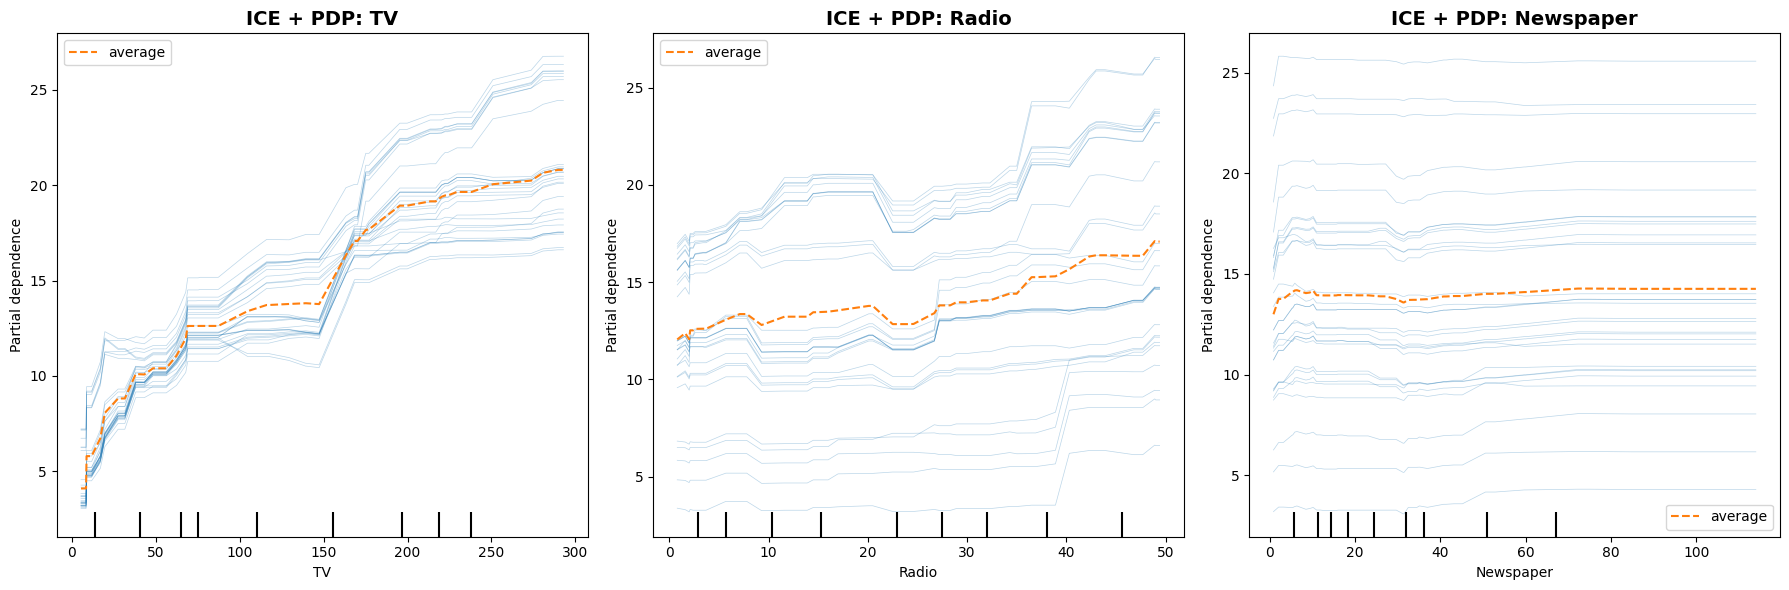


✅ Sklearn ICE plots completed!
📝 Note: Blue lines = Individual ICE curves, Orange line = PDP (average)


In [ ]:
# built with cursor
## Method 2: Using Scikit-learn's Built-in ICE Implementation

# Scikit-learn provides ICE plots via PartialDependenceDisplay with kind='individual' or kind='both'

print("🎨 Creating ICE Plots using Scikit-learn")
print("=" * 50)

# Create subplots for all features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, feature in enumerate(features):
    print(f"\n📊 Creating sklearn ICE plot for: {feature}")

    # Create ICE plot with both individual curves and average
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_test,  # Using test set
        [feature],
        kind='both',  # Shows both ICE curves and PDP
        subsample=30,  # Limit number of ICE curves for readability
        n_cols=1,
        random_state=42,
        ax=axes[idx]
    )

    axes[idx].set_title(f'ICE + PDP: {feature}', fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Sklearn ICE plots completed!")
print("📝 Note: Blue lines = Individual ICE curves, Orange line = PDP (average)")


## **commentary on ICE**

In these ICE plots, we see some divergence in the individual curves. This seems to suggest that when you choose different points to anchor and then perturb just one feature, it can matter which point you started with. For instance, looking at the TV plot, for all of the curves, we see that increasing TV spend leads to higher sales. However, depending on how much you're already spending on the other two features, the slope of this relationship varies. Some grow faster and higher, whereas others grow slower and flatter.

This could make sense because if consumers have already heard your advertisements over the radio or newspaper, then increasing your TV spend will not receive as much benefit as if you had zero spend on the other two and now you are attacking a totally untapped market with your TV ads, which would lead to ICE curves that are steeper.

Overall, however, the `ice_curves` look relatively parallel, suggesting that in general the perturbations in these features have roughly similar effects irrespective of what the other features are.

We see once again the impact of correlations as well. Where the highly correlated feature of TV has a very steep slope across all the `ice_curves`, whereas the newspaper one is relatively flat, irrespective of how we incur the other features.


--------
# ALE Plots

Accumulated Local Effects (ALE) Plots [Paper, 2020](https://www.scholars.northwestern.edu/en/publications/visualizing-the-effects-of-predictor-variables-in-black-box-super)

**How to create an ALE plot:**
1. Bin the Feature: Divide the feature of interest into several intervals (bins). These bins help in managing the data and computing local effects within smaller, more manageable segments.
2. Compute Local Effects: For each bin, calculate the local effect of the feature on the prediction. This involves: Calculating the change in prediction when moving from the lower to the upper edge of the bin
Averaging this change over all instances that fall into that bin
3. Accumulate Effects: Starting from the first bin, accumulate the local effects across all bins. Sum up the average effects sequentially to show how the feature influences the prediction as its value changes
4. Centering: To make the plot more interpretable, center the accumulated effects around zero. Subtract the mean of the accumulated effects, which forces the interpretation to focus on deviations from the average prediction

There are a few python implementations of ALE plots, here we show the [ALEPython implementation](https://github.com/blent-ai/ALEPython).

The implementation is more complex and less intuitive than PDPs, with many hyperparameters, including:
* **bins** - This parameter defines the number of bins to divide the range of the specified feature into. A larger number of bins can provide more granularity in the ALE plot but might also increase computation time.
* **monte_carlo** - This parameter is a boolean flag indicating whether to use Monte Carlo sampling to estimate the ALE. Monte Carlo sampling can be beneficial when the number of samples in the dataset is large, as it reduces computational burden.
* **monte_carlo_rep** - This parameter specifies the number of Monte Carlo replicates to use for estimating the ALE. More replicates can lead to a more accurate estimation but may also increase computation time.
* **monte_carlo_ratio** - This parameter determines the proportion of the dataset to use for Monte Carlo sampling. It's a value between 0 and 1, where 1 means using the entire dataset. Using a smaller ratio can speed up computation but may introduce some sampling error.


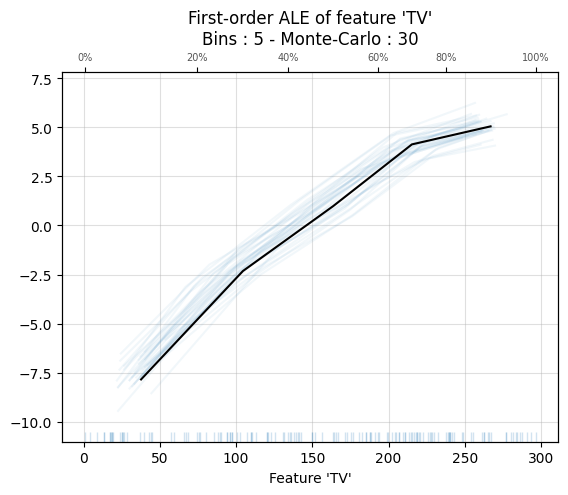

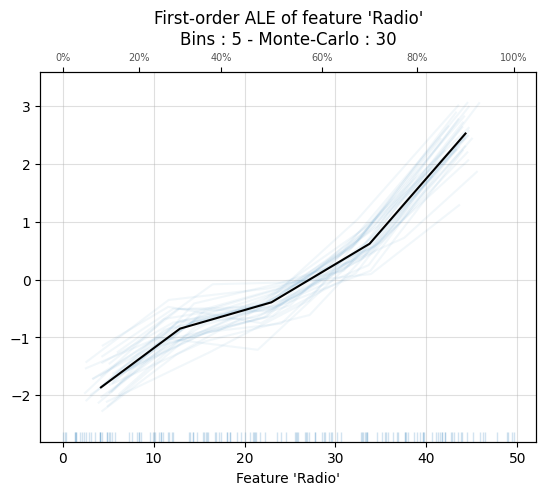

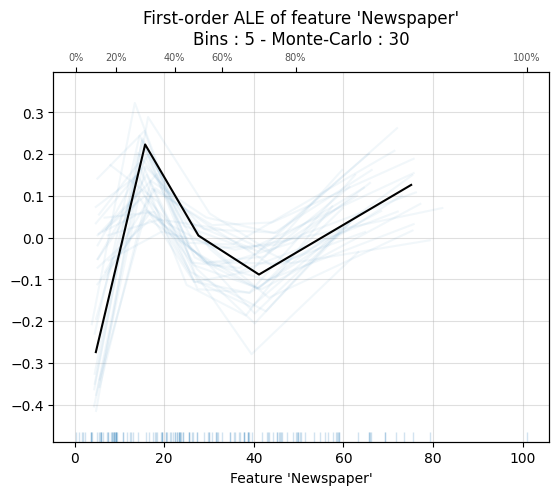

In [ ]:
# built with cursor
for feature in features:
    # Change hyperparameters for 1D Main Effect ALE Plot
    ale_plot(
        model,
        X_train,
        feature,
        bins=5,
        monte_carlo=True,
        monte_carlo_rep=30,
        monte_carlo_ratio=0.5,
    )

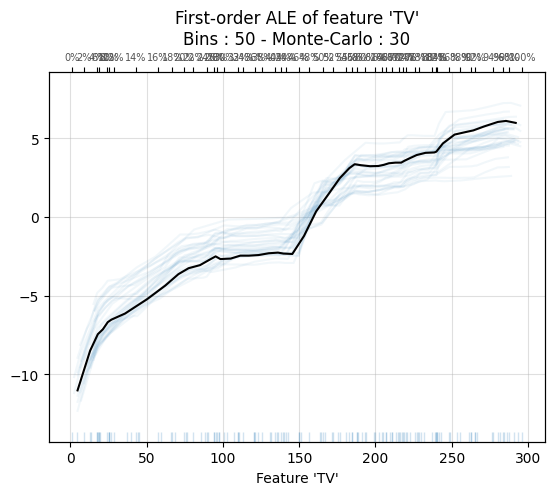

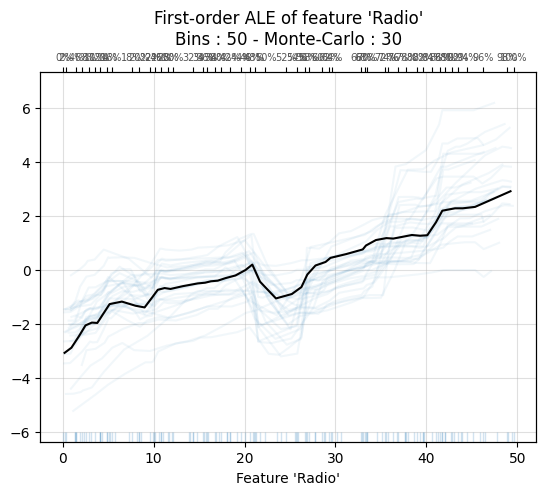

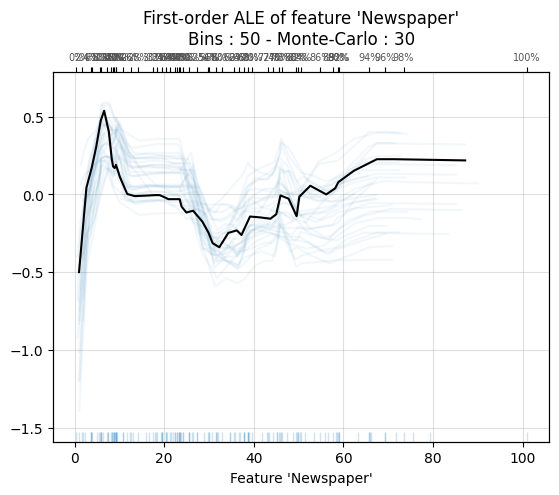

In [ ]:
for feature in features:
    # Change hyperparameters for 1D Main Effect ALE Plot
    ale_plot(
        model,
        X_train,
        feature,
        bins=50,
        monte_carlo=True,
        monte_carlo_rep=30,
        monte_carlo_ratio=0.5,
    )

## **commentary on ALE**
It's very important to use a sufficiently-high bin count for ALE, lest it produce a very simplified graph.  However, as bin count increases, ALE appears to converge on something closer to the PDP plots.  We can even see that for high bin count, ALE's plots demonstrate more complexity in the curve than does PDP.

The ALE plots seem to show very similar results as the PDP plots. This is a good sign because that means that we can use both plots for the same fundamental ideas.

It's worth noting that they don't provide exactly the same curves. For instance, in the newspaper ALE plot, at 50 bins, the saturated impact of very high newspaper spend is actually lower than the original jump of the first couple thousand spent. This tells us that we should look closer at the relationship here because taking a different analytical tool is suggesting different absolute impacts.

That being said, the overall relative trend is consistent.

